Author: Sara Limooee(salidotir)

### **Twitter Fake News Detector**


> We are going to create a model for detecting fake news with 3 ways:
*   **Decision trees**
*   **K-Fold cross validation**
*   **Random forest**

> In order to be able to use the dataset, we should first do some modifications on data and create a label for the current data we have.

> In **data preparation** section, we first fetch data and create a new column as "label" that shows the news label, **'0'** for **fake** and **'1'** for **real**.

> Then, we merge all the fake and real news and finally, split the data, 80% as the train data and 20% as the test data.

> Finally, we should delete the "label" column from data and train each of models with the training data.

> As the result, to check the accuracy of out model, we test the model with test data, the new data that the model has not seen before.

# Data Prepration

In this code, we are going to detect fake new based on two datasets ["pol-real.csv"](https://drive.google.com/file/d/1B2-y0kIEKc_H2lTBK09H0rXcr9GqLsd4/view?usp=sharing) & ["pol-fake.csv"](https://drive.google.com/file/d/19YL0r2cPLv-eqRUhN13dkqdNlvr987St/view?usp=sharing).

required libraries:
*   sklearn
*   numpy
*   pandas -> for reading csv
*   matplotlib

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

To get the datasets mentioned above, I should first connect to my google drive & then use the datasets uploaded.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First, copy the datasets from google drive to virtual hard disk.

In [ ]:
!cp "/content/drive/MyDrive/Neural Network Datasets/pol-fake.csv" "/content/sample_data"
!cp "/content/drive/MyDrive/Neural Network Datasets/pol-real.csv" "/content/sample_data"

Then I do the following steps:

*   Merge the two datasetes with suitable label of 0 as fake & 1 as real
*   Shuffel data samples
*   Use 80% of data as training data
*   Use 20% of data as test data

In [ ]:
train_size = 0.8
test_size = 0.2

In [ ]:
data_fake = pd.read_csv("/content/sample_data/pol-fake.csv")
data_real = pd.read_csv("/content/sample_data/pol-real.csv")

In [ ]:
data_fake.shape , data_real.shape

((377, 35), (365, 35))

In [ ]:
# add label for all news
data_fake["label"] = "0"
data_fake.to_csv("/content/sample_data/pol-fake.csv", index=False)
data_real["label"] = "1"
data_real.to_csv("/content/sample_data/pol-real.csv", index=False)

# merge 2 datasets
all_news = data_fake.append(data_real)
# shuffle all_news
all_news = all_news.sample(frac=1)
# create a new all_news.csv
all_news.to_csv("/content/sample_data/all_news.csv")

# divide traint & test data
all_news.head(10)

,total nodes,number tweets,number retweet,number replies,depth,freq,vrf,leader,normal,total sentiment,co,centralty,diam,ecc,num sh path,num clique,num idp,max out,empty,engage max,num normal max,num leader max,lc,t freq,r freq,tpfr,t max,snt first,snt deep,snt ratio,score comm,local,snt sh path,wight clique,snt idp,label
235,6,3,3,0,2,876.37,3,3,0,0.0000,0.00,0.00,0,0.000000,0,0,3,2,3,0,3,5258.210556,750.979246,0.193294,0.749722,5256.854722,0.000000,0.000000,0.000000,0.000000,0.0000,0,0.000000,0.000000,0.0000,1
117,461,219,181,61,4,4.78,181,69,112,-10.1395,0.87,-0.30,4,2.754098,4,9,3,105,186,110,58,31.000000,2205.281111,4.771201,4.734590,22.076453,56.817778,-0.262630,-2.631800,0.491803,11.1763,9,-0.508900,-6.281514,-0.1146,0
105,1,1,0,0,1,0.00,0,0,0,0.0000,0.00,0.00,0,0.000000,0,0,0,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0,0.000000,0.000000,0.0000,0
355,105,104,1,0,2,570.60,1,1,0,0.0000,0.00,0.00,0,0.000000,0,0,1,103,1,0,1,54027.405560,565.214990,0.000000,0.021944,54027.383610,0.000000,0.000000,0.000000,0.000000,0.0000,0,0.000000,0.000000,0.0000,1
96,102,81,14,7,2,85.90,14,6,8,0.6828,0.00,0.00,0,0.000000,2,2,3,68,3,2,1,5950.848056,85.065146,57.775054,16.715476,0.000000,0.052523,0.000000,0.428571,0.000000,0.0000,0,0.621886,-0.357300,-0.2597,0
156,134,54,77,3,2,1.59,77,31,46,-0.5194,0.00,0.00,0,0.000000,2,2,29,43,29,14,15,212.991111,0.384846,1.577416,12.868323,20.905556,-0.047218,0.000000,0.333333,0.000000,0.0000,0,-0.066200,-0.840200,-0.5194,0
201,7591,5114,1396,1081,5,7.18,1396,746,650,40.5085,0.91,0.00,4,2.707678,4,100,3,272,4493,349,80,50.000000,54117.138060,7.180173,6.106997,30.877231,49813.153610,0.013917,0.073400,0.224792,148.3781,103,-0.047700,14.959772,0.2131,0
83,1310,484,621,205,5,9.35,621,245,376,-11.4519,0.87,0.00,4,2.921951,4,36,3,134,412,148,61,32.000000,12251.294440,6.129232,9.340138,18.288929,10.265000,-0.200878,-0.758300,0.375610,46.5997,26,0.094400,-0.092148,0.2968,1
334,2,2,0,0,1,10.44,0,0,0,0.0000,0.00,0.00,0,0.000000,0,0,0,2,0,0,0,0.000000,6.957407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0,0.000000,0.000000,0.0000,0
188,871,203,542,126,4,10.36,542,196,346,6.8718,0.85,0.27,4,2.880952,4,28,4,116,154,141,66,40.000000,8090.515556,10.348188,9.276480,24.489228,0.000000,0.147080,0.896300,0.333333,31.6924,23,0.277000,1.867102,-0.1170,0


Here, I split the all_news.csv to test & train data.

In [ ]:
# split all_news to test & train data
x_news = all_news.drop('label', axis=1)
y_news = all_news["label"]
x_train, x_test, y_train, y_test = train_test_split(x_news, y_news, 
                                                      train_size=train_size,
                                                      test_size=test_size,
                                                      random_state=122,
                                                      shuffle=True)


x_train.head(10) , y_train.head(10)

(     total nodes  number tweets  ...  wight clique  snt idp
 174           23             20  ...      0.000000   0.0000
 102           44             22  ...      0.000000   0.0000
 98           505            154  ...      0.683937  -0.1821
 0              3              3  ...      0.000000   0.0000
 295           48             37  ...      0.763150   0.5411
 248          111             58  ...      0.169142  -0.1346
 3            401            266  ...     -1.475459  -0.1419
 37            94             60  ...     -0.448010  -0.7506
 298          373            164  ...      0.420585   0.1228
 262            1              1  ...      0.000000   0.0000
 
 [10 rows x 35 columns], 174    0
 102    1
 98     1
 0      1
 295    1
 248    0
 3      0
 37     1
 298    0
 262    0
 Name: label, dtype: object)

# Decision tree classifier

> First, create decision tree and train the model using x_train & y_train data

> Second, predict the output of x_test data by calling predict() function

> Third, Compute below metrics:
  *   Accuracy score
  *   Consusion matrix
  *   Precision score
  *   Recall score
  *   F1 score

### Decision tree classifier with the Gini index method

To use Gini index method, which is also the default method for decision tree, set 'criterion' attribute to 'gini'.

accuracy: 64.42953020134227
confusion matrix:
[[45 26]
 [27 51]]
precision: 0.6442953020134228
recall: 0.6442953020134228
F1: 0.6442953020134228
              precision    recall  f1-score   support

           0       0.62      0.63      0.63        71
           1       0.66      0.65      0.66        78

    accuracy                           0.64       149
   macro avg       0.64      0.64      0.64       149
weighted avg       0.64      0.64      0.64       149



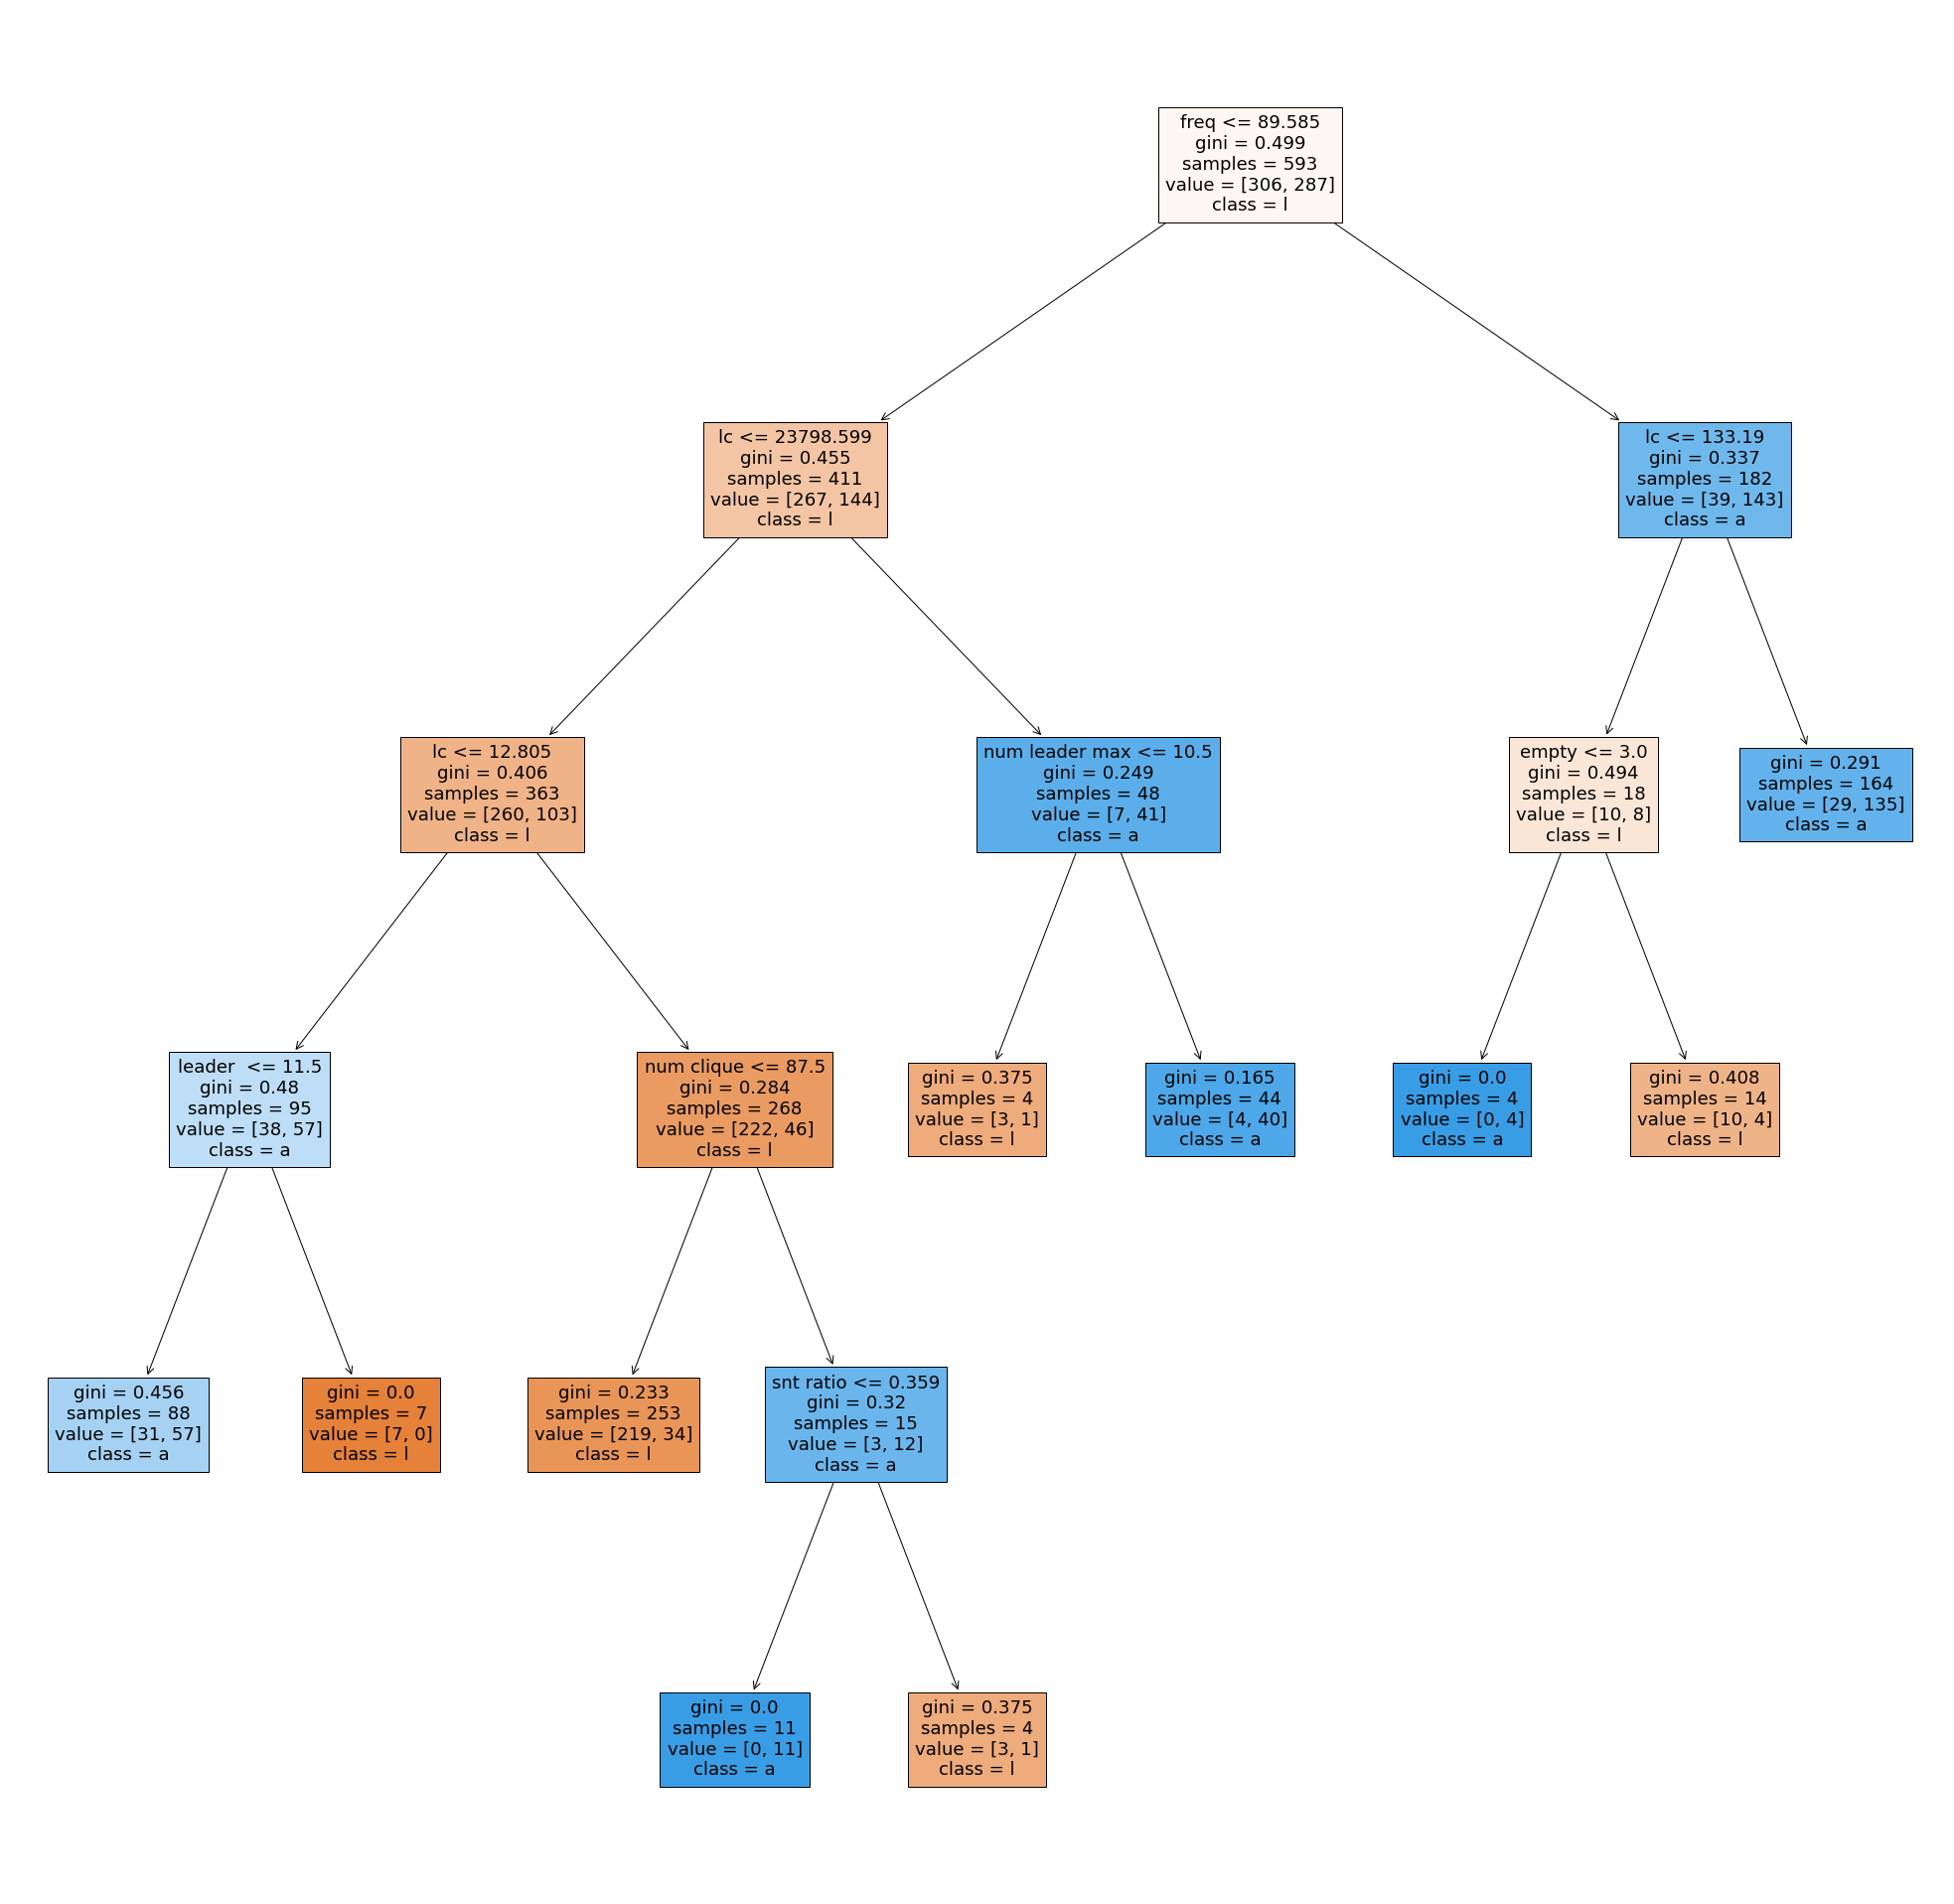

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# train the model
fake_news_classifier_gini = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10, random_state=0)
fake_news_classifier_gini.fit(x_train, y_train)

# predicting on test data
y_predict = fake_news_classifier_gini.predict(x_test)

# check accuracy
print(f'accuracy: {accuracy_score(y_test, y_predict)*100}')

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(y_test, y_predict)}')

# precision score
print(f'precision: {precision_score(y_test, y_predict, labels=["0", "1"], average="micro")}')

# recall score
print(f'recall: {recall_score(y_test, y_predict, labels=["0", "1"], average="micro")}')

# F1 score
print(f'F1: {f1_score(y_test, y_predict, labels=["0", "1"], average="micro")}')

# classification report
print(classification_report(y_test, y_predict))

# plot decision tree
fig = plt.figure(figsize=(35, 35))
_ = plot_tree(fake_news_classifier_gini, 
                   feature_names=all_news.columns,  
                   class_names="label",
                   filled=True)

In [ ]:
# test by hand, i>=1
i = 1
y_predict_1 = fake_news_classifier.predict(x_test.head(i))
print(f'y_predict {i}: {y_predict_1},\ny_actual {i}: {y_test.head(i)}')

y_predict 1: ['0'],
y_actual 1: 187    0
Name: label, dtype: object


### Decision tree classifier with information gain method


To use information gain method, set 'criterion' attribute to 'entropy'.

accuracy: 65.77181208053692
confusion matrix:
[[42 29]
 [22 56]]
precision: 0.6577181208053692
recall: 0.6577181208053692
F1: 0.6577181208053692
              precision    recall  f1-score   support

           0       0.66      0.59      0.62        71
           1       0.66      0.72      0.69        78

    accuracy                           0.66       149
   macro avg       0.66      0.65      0.65       149
weighted avg       0.66      0.66      0.66       149



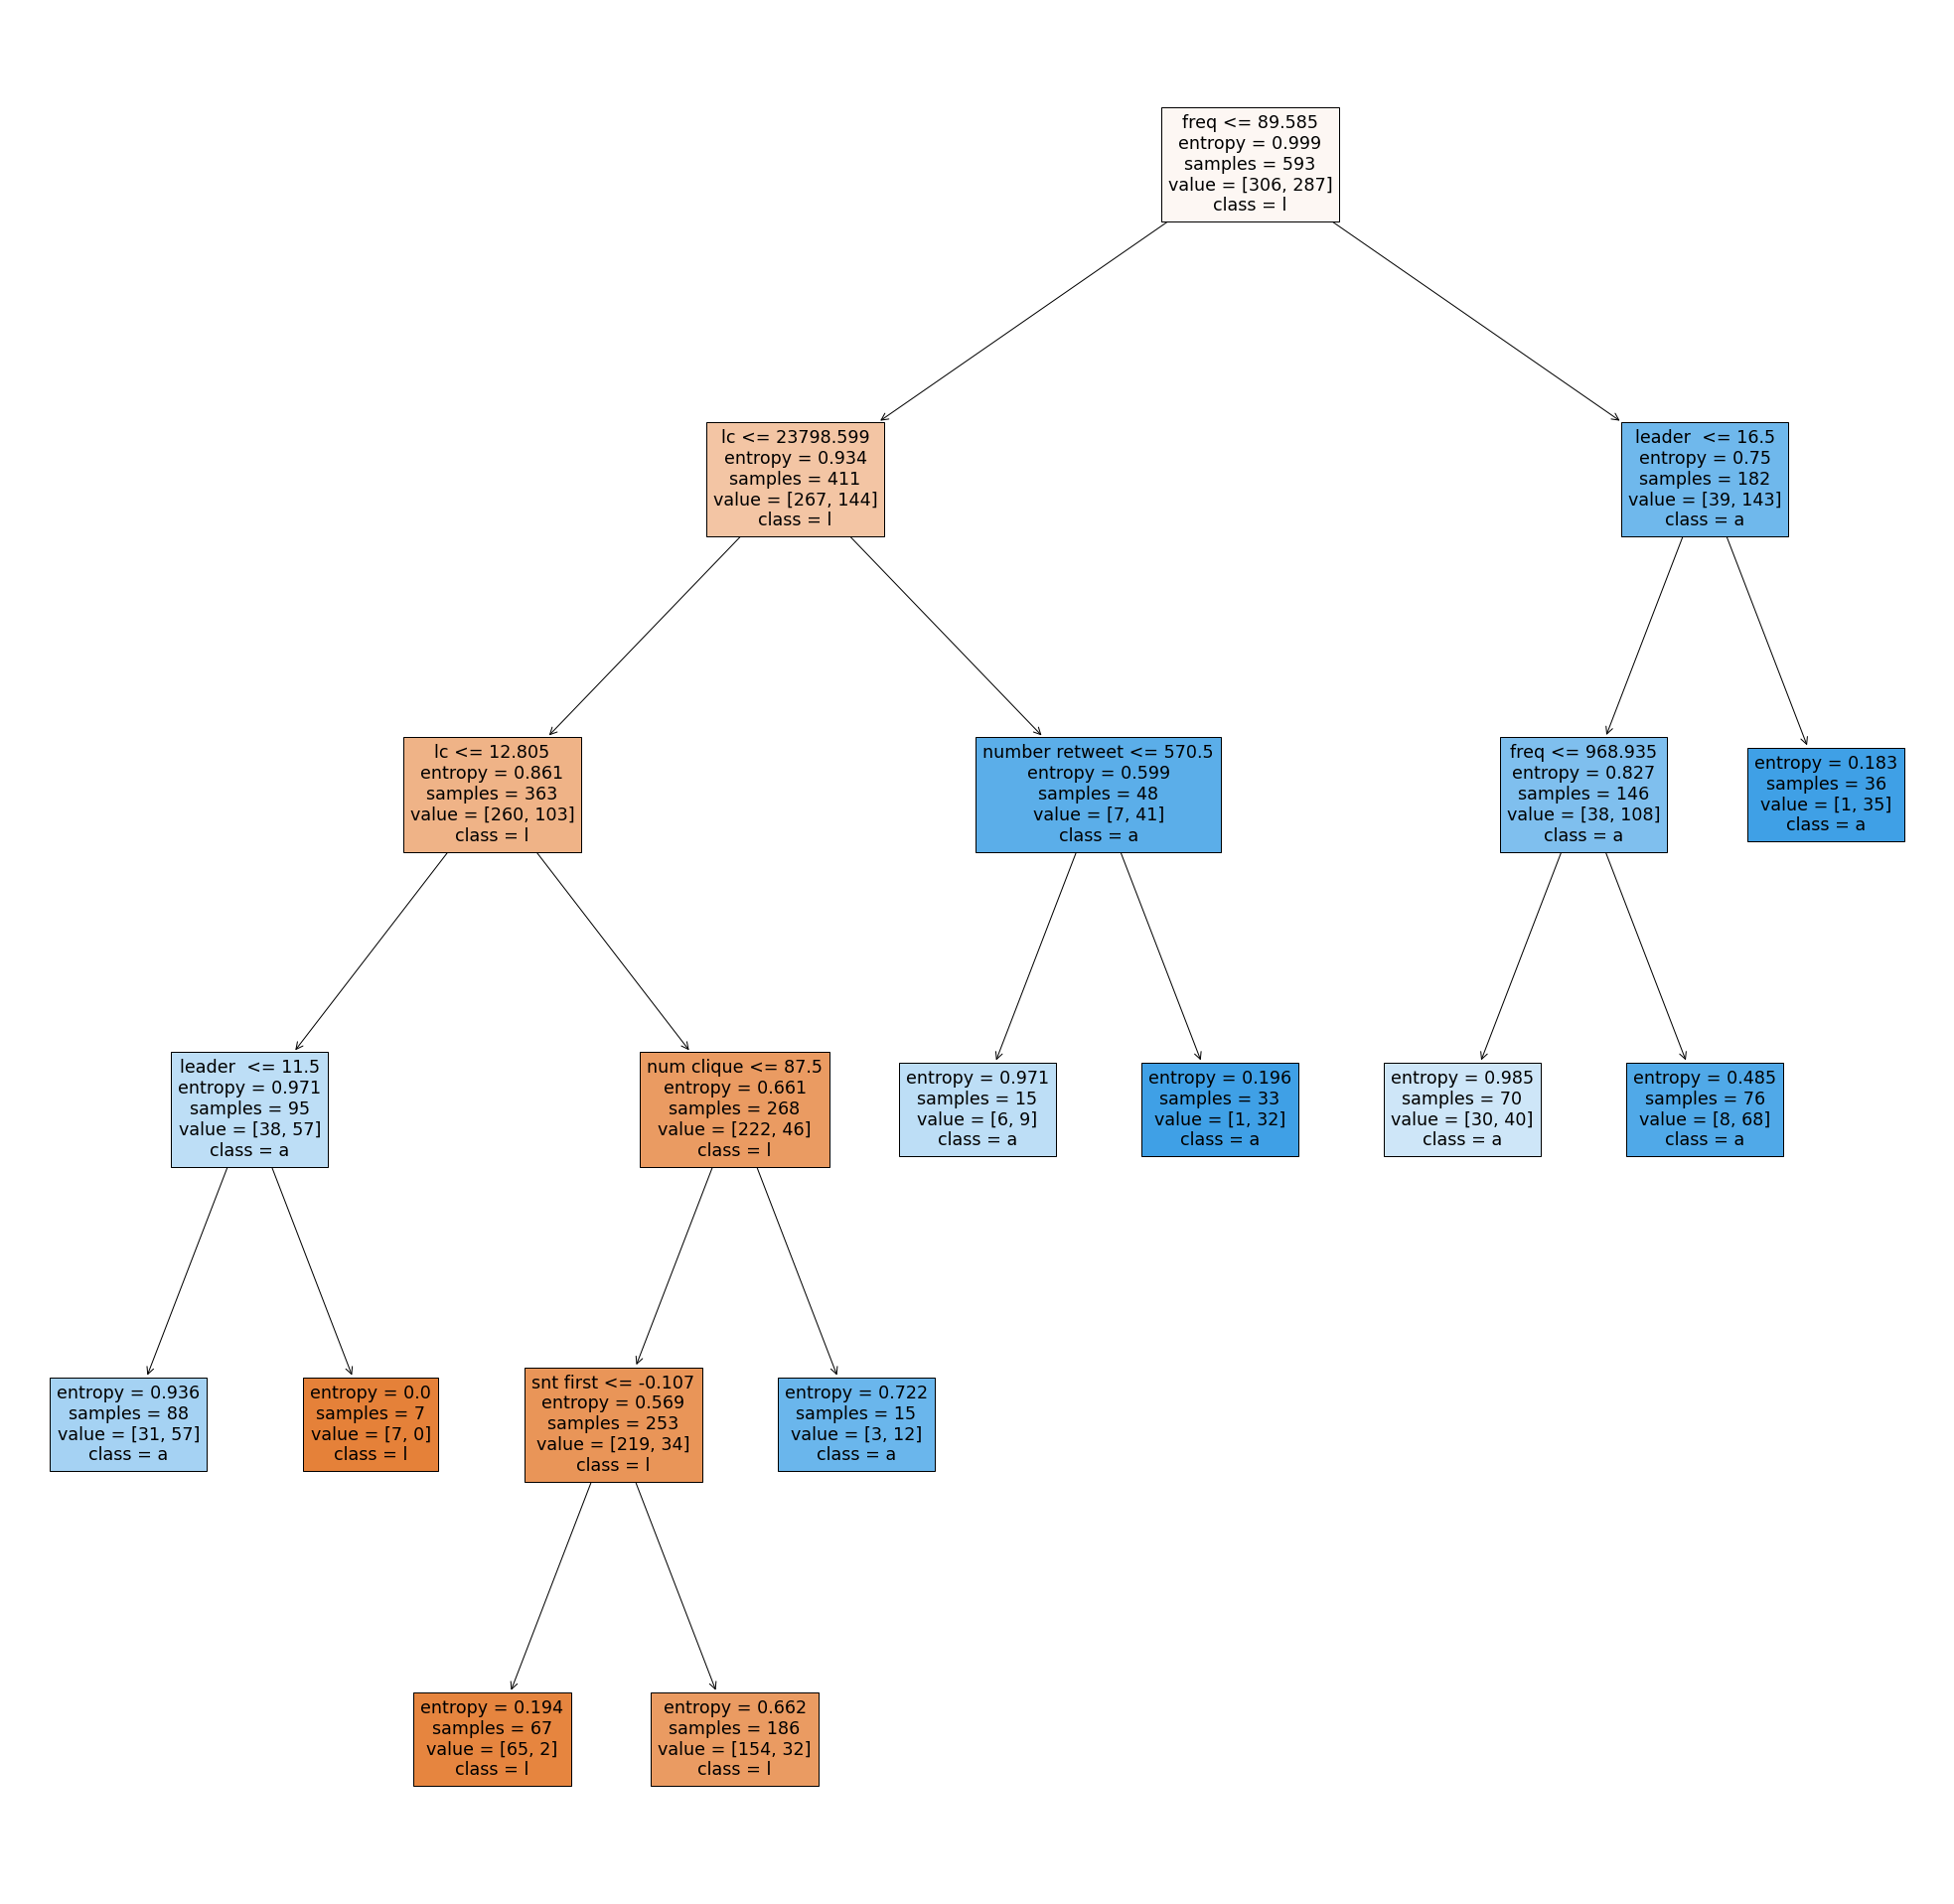

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# train the model
fake_news_classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
fake_news_classifier_entropy.fit(x_train, y_train)

# predicting on test data
y_predict = fake_news_classifier_entropy.predict(x_test)

# check accuracy
print(f'accuracy: {accuracy_score(y_predict, y_test)*100}')

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(y_test, y_predict)}')

# precision score
print(f'precision: {precision_score(y_test, y_predict, labels=["0", "1"], average="micro")}')

# recall score
print(f'recall: {recall_score(y_test, y_predict, labels=["0", "1"], average="micro")}')

# F1 score
print(f'F1: {f1_score(y_test, y_predict, labels=["0", "1"], average="micro")}')

# classification report
print(classification_report(y_test, y_predict))

# plot decision tree
fig = plt.figure(figsize=(35, 35))
_ = plot_tree(fake_news_classifier_entropy, 
                   feature_names=all_news.columns,  
                   class_names="label",
                   filled=True)

# K-Fold Cross Validation

In this section, we are going to implement fake news detector using 10-fold croos validation method.

I divide all samples into 10 folds, run the training procedure for 10 times, each time on each of the folds is considered as the test data and others are considered as the training data.

In [ ]:
from sklearn.model_selection import cross_val_score

k = 10

scores = cross_val_score(fake_news_classifier_gini, x_news, y_news, cv=k, scoring='accuracy')
for k_index in range(k):
  print(f'k: {k_index}  accuracy: {scores[k_index]*100}')

k: 0  accuracy: 77.33333333333333
k: 1  accuracy: 70.66666666666667
k: 2  accuracy: 79.72972972972973
k: 3  accuracy: 67.56756756756756
k: 4  accuracy: 72.97297297297297
k: 5  accuracy: 78.37837837837837
k: 6  accuracy: 72.97297297297297
k: 7  accuracy: 72.97297297297297
k: 8  accuracy: 72.97297297297297
k: 9  accuracy: 85.13513513513513


As it is clear in the results, for k=9 we get the highest accuarcy for decision tree with gini method.

In [ ]:
from sklearn.model_selection import cross_val_score

k = 10

scores = cross_val_score(fake_news_classifier_entropy, x_news, y_news, cv=k, scoring='accuracy')

for k_index in range(k):
  print(f'k: {k_index}  accuracy: {scores[k_index]*100}')

k: 0  accuracy: 81.33333333333333
k: 1  accuracy: 62.66666666666667
k: 2  accuracy: 72.97297297297297
k: 3  accuracy: 71.62162162162163
k: 4  accuracy: 72.97297297297297
k: 5  accuracy: 77.02702702702703
k: 6  accuracy: 77.02702702702703
k: 7  accuracy: 72.97297297297297
k: 8  accuracy: 71.62162162162163
k: 9  accuracy: 85.13513513513513


Also for k=9, we get the highest accuarcy for decision tree with information gain method.

# Random Forest

**Random forests** or **Random decision forests** is a supervised learning algorithm consisting of a large number of individual decision trees that operate as an ensemble.

Simply, random forest **builds multiple decision trees** and **merges** them together to get a more accurate prediction. So, it will work better for a large number of data as a single decision tree.

Another advantage of random forest over single decision tree is that it can avoid overfitting by averaging the results of diffrent decision trees.
<br/>
<br/>

**Overfitting**:

Also called **high variance** is called a mode when error on the train data is very small but it does not work well on test data.

This means that the model cannot detect new data that has not seen before very well.

This mainly occur when model learns every thing of train data besides the main part of data.

This problem can be solved with different ways:
1. Training the model with more data
2. Regularization
3. Or in random forest algorithm, as said above, by averaging the results of diffrent decision trees
<br/>
<br/>

**Random Forest algorithm pseudocode**:

a. Randomly select “K” features from total “m” features where k << m

b. Among the “K” features, calculate the node “d” using the best split point

c. Split the node into daughter nodes using the best split

d. Repeat the a to c steps until “l” number of nodes has been reached

e. Build forest by repeating steps a to d for “n” number times to create “n” number of trees

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

fake_news_classifier_RFC = RandomForestClassifier(random_state=0)
fake_news_classifier_RFC.fit(x_train, y_train)

y_predict = fake_news_classifier_RFC.predict(x_test)

# check accuracy
print(f'accuracy: {fake_news_classifier_RFC.score(x_test, y_test)}')

# classification report
print(classification_report(y_test, y_predict))

accuracy: 0.7516778523489933
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        71
           1       0.79      0.72      0.75        78

    accuracy                           0.75       149
   macro avg       0.75      0.75      0.75       149
weighted avg       0.76      0.75      0.75       149



# Results

As it is clear from all the results, the accuracy for K-Fold is higher than other methods.

Also, the accuracy for Random Forest Classifier, is better than Decision Tree.